# Import module

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

Or from the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

## ImageAnalysis3 and basic modules

In [1]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
from ImageAnalysis3 import *
from ImageAnalysis3.classes import _allowed_kwds

import h5py
import ast
import pandas as pd

print(os.getpid())

24808


## Chromatin_analysis_tools etc

See **functions** in the repository for [AnalysisTool_Chromatin](../../README.md)

In [27]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

# Define folders

In [28]:
# main folder for postanalysis
postanalysis_folder = r'L:\Shiwei\postanalysis_2024\v0'
# input files for postanalysis
input_folder = os.path.join(postanalysis_folder, 'resources_from_preprocess')

# output file to be generated
output_main_folder = os.path.join(postanalysis_folder, 'radial_position')

output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

# make new folder if needed
make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')

Use existing analysis folder: L:\Shiwei\postanalysis_2024\v0\radial_position\analysis.
Use existing figure folder: L:\Shiwei\postanalysis_2024\v0\radial_position\figures.


# Plotting parameters

In [29]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

In [30]:
# Other required plotting parameters
_dpi = 300
_font_size = 7
_page_width = 5.5


## cell type color-codes

In [31]:
# cell labels from RNA-MERFISH and celltype prediction
selected_cell_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]
# cell palette from RNA-MERFISH UMAP and stats
celltype_palette = {'Astro':'lightcoral', 
                    'Endo':'skyblue', 
                    'L2/3 IT':'gold', 
                    'L4/5 IT':'darkorange', 
                    'L5 ET':'mediumseagreen', 
                    'L5 IT':'aqua',
                    'L5/6 NP':'darkgreen',
                    'L6 CT':'brown',
                    'L6 IT':'magenta',
                    'L6b':'blue', 
                    'Lamp5':'orange', 
                    'Micro':'peachpuff',
                    'OPC':'thistle', 
                    'Oligo':'darkviolet',
                    'Peri':'sandybrown',
                    'Pvalb':'springgreen',
                    'SMC':'rosybrown',
                    'Sncg':'darkkhaki',
                    'Sst':'steelblue', 
                    'VLMC':'saddlebrown', 
                    'Vip':'red',
                    'other':'slategray'}


In [32]:
# this is the plotting order noted based on the snRNA transcriptional acitivty if needed
sorted_cellplot_order_byRNA = ['Micro', 'Oligo', 'Endo', 'OPC', 'Astro', 'Vip', 'Lamp5',
                  'L5/6 NP', 'Sst', 'Sncg', 'Pvalb', 'L4/5 IT', 'L6 CT',
                  'L6 IT', 'L6b', 'L2/3 IT', 'L5 IT', 'L5 ET']

# Load data relevant information

## load and format codebook

[merged codebook](../resources/merged_codebook.csv) as in the repository (merged for all DNA-MERFISH libraries)

In [33]:
# Load codebook 
codebook_fname = os.path.join(input_folder,'merged_codebook.csv')
codebook_df = pd.read_csv (codebook_fname, index_col=0)

# sort df by chr and chr_order
codebook_df = loci_1d_features.sort_loci_df_by_chr_order (codebook_df)
codebook_df.head()

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_479,NDB_562,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604
0,1:3742742-3759944,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1:6245958-6258969,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1:8740008-8759916,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1016,1:9627926-9637875,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,1:9799472-9811359,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [34]:
# Format the chr loci name by 
# 1. changing loci name format
# 2. extract relevant information such as id, chr, chr_order, and library etc
from gene_to_loci import loci_pos_format
loci_name_list = list(map(loci_pos_format, codebook_df['name'].tolist()))
loci_name_arr = np.array(loci_name_list)

# convert to a new dataframe and set loci name as index
codebook_df = codebook_df[['name','id','chr','chr_order','library']]
codebook_df['loci_name'] = list(loci_name_arr[:,0])
codebook_df = codebook_df.set_index ('loci_name')

codebook_df.head()

,name,id,chr,chr_order,library
loci_name,,,,,
chr1_3742742_3759944,1:3742742-3759944,1,1,0.0,CTP11
chr1_6245958_6258969,1:6245958-6258969,2,1,1.0,CTP11
chr1_8740008_8759916,1:8740008-8759916,3,1,2.0,CTP11
chr1_9627926_9637875,1:9627926-9637875,1,1,3.0,CTP13
chr1_9799472_9811359,1:9799472-9811359,2,1,4.0,CTP13


# Load radial position from single cells by cell type 

In [35]:
analysis_df_fname

'L:\\Shiwei\\postanalysis_2024\\v0\\radial_position\\analysis\\radial_single_cell_allLoci_100kb.csv'

In [36]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm  
import os

# if with 100kb of the loci
_ext = 100

chrom_list = [c for c in np.unique(codebook_df['chr']) if c!= 'Y']
chrom_list = [c for c in chrom_list  if c!='X']
chrom_list.sort(key = int)
chrom_list.append('X')

analysis_df_fname = os.path.join(output_analysis_folder, f'radial_single_cell_allLoci_{_ext}kb.csv')

if os.path.exists(analysis_df_fname):
    sc_ave_radial_df_all = pd.read_csv(analysis_df_fname, index_col=0)
    print("Load radial data")
    
else:
    print("Start process radial data")
    
    sc_ave_radial_df_list = []
    for chosen_chrom in chrom_list[:]:
        radial_chr_fname = os.path.join(output_analysis_folder,
                                        'radial_pos_byChr', 
                                        f'Chr{chosen_chrom}_single_cell_radial_position.h5')
        _loci_name_list = codebook_df[codebook_df['chr']==chosen_chrom].index.tolist()
        if os.path.exists(radial_chr_fname):
            print('Loading')
            sc_radial_df = pd.read_hdf(radial_chr_fname, index_col=0)

            # Initialize an empty dictionary to store average values
            averaged_columns = {}
            # Use tqdm to show progress over columns
            for column_name in tqdm(sc_radial_df.columns, desc="Calculating medians"):
                # Calculate the median for each cell assuming each cell contains an iterable
                averaged_columns[f"{column_name}_ave"] = sc_radial_df[column_name].apply(lambda x: np.nanmedian(x) 
                                                                                         if isinstance(x, (list, np.ndarray)) else x)
                
            # Create a new DataFrame from the averaged columns dictionary
            sc_ave_radial_df = pd.DataFrame(averaged_columns)
            sc_ave_radial_df.index = sc_radial_df.index
            # filter by number of loci for the chr; current half of loci
            _good_chr_len_th = int(len(sc_radial_df.columns)/2)
            _good_inds = list(np.sum(~np.isnan(sc_ave_radial_df), axis=1)>= _good_chr_len_th)
            sc_ave_radial_df = sc_ave_radial_df.loc[_good_inds , :]
            
            sc_ave_radial_df_list.append(sc_ave_radial_df)
            
    # Concatenate DataFrames along columns, keeping all unique indices (outer join) as the above filtering will remove some obs
    sc_ave_radial_df_all = pd.concat(sc_ave_radial_df_list, axis=1, join='outer')
    sc_ave_radial_df_all.to_csv(analysis_df_fname)



Load radial data


In [37]:
sc_ave_radial_df_all.head(10)

,chr1_3742742_3759944_rp_ave,chr1_6245958_6258969_rp_ave,chr1_8740008_8759916_rp_ave,chr1_9627926_9637875_rp_ave,chr1_9799472_9811359_rp_ave,chr1_11247744_11257616_rp_ave,chr1_13741888_13757922_rp_ave,chr1_16251322_16259969_rp_ave,chr1_18749330_18759924_rp_ave,chr1_20920666_20929358_rp_ave,...,chrX_151244970_151259694_rp_ave,chrX_153743904_153759903_rp_ave,chrX_156242675_156257265_rp_ave,chrX_158749404_158759978_rp_ave,chrX_161247067_161259813_rp_ave,chrX_163750534_163758706_rp_ave,chrX_166247682_166259932_rp_ave,chrX_167157164_167167452_rp_ave,chrX_168746045_168757590_rp_ave,chrX_169963295_170005197_rp_ave
uid,,,,,,,,,,,,,,,,,,,,,
259202492748634617304623818845147108919,0.663333,NaN,NaN,NaN,0.389658,0.670838,NaN,NaN,NaN,0.368213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336074706103419484501535095917410831417,NaN,0.919306,0.969600,0.866127,NaN,0.878440,NaN,0.867783,0.892323,NaN,...,0.579759,0.735329,NaN,0.716530,0.573704,NaN,0.405672,NaN,NaN,0.656132
179117357717369278884189379535888871018,0.801852,0.662913,0.701575,NaN,0.809145,NaN,NaN,0.676111,0.685246,0.976274,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92271180002801802991585284299263797402,0.968610,0.795138,NaN,0.800132,0.727659,0.606813,0.793136,0.842555,0.784566,NaN,...,0.728725,0.786005,NaN,1.000000,0.743595,0.678599,NaN,0.822878,0.897859,0.793050
237111112842863990529297306931448726772,NaN,0.730079,NaN,NaN,NaN,NaN,NaN,0.791152,NaN,NaN,...,1.000000,1.000000,NaN,NaN,0.825552,NaN,NaN,NaN,NaN,NaN
277329575662461655523555123142354723933,0.869639,NaN,NaN,NaN,NaN,NaN,0.966021,NaN,NaN,0.893948,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68479621772619797446551198722297607886,NaN,NaN,0.878469,0.809328,0.853382,NaN,0.837868,0.659160,0.896189,0.601587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240118104587723769186744040764939638810,0.886202,0.825985,NaN,0.794075,NaN,0.804243,0.815328,NaN,0.967251,0.679360,...,NaN,0.542725,NaN,0.620154,0.579920,0.697336,NaN,NaN,NaN,0.794457
40195949218176059251921603414100340819,NaN,NaN,0.620347,0.479219,0.489480,0.966367,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,0.815146,1.000000,0.829766


# Add celltype information from RNA-MERFISH

In [38]:
import scanpy as sc
target_adata_folder = r'L:\Shiwei\RNA_MERFISH_analysis\Merged_nonclear'
# load the processed adata that has UMAP and label information
merged_adata = sc.read(os.path.join(target_adata_folder,'filtered_unnorm_data_w_label.h5ad'))

In [39]:
shared_obs = np.intersect1d(sc_ave_radial_df_all.index, merged_adata.obs.index)
sc_ave_radial_df_all = sc_ave_radial_df_all.loc[shared_obs]
sel_merged_adata = merged_adata[shared_obs]

sc_ave_radial_df_all['celltype'] = sel_merged_adata.obs['subclass_label_new']
sc_ave_radial_df_all

,chr1_3742742_3759944_rp_ave,chr1_6245958_6258969_rp_ave,chr1_8740008_8759916_rp_ave,chr1_9627926_9637875_rp_ave,chr1_9799472_9811359_rp_ave,chr1_11247744_11257616_rp_ave,chr1_13741888_13757922_rp_ave,chr1_16251322_16259969_rp_ave,chr1_18749330_18759924_rp_ave,chr1_20920666_20929358_rp_ave,...,chrX_153743904_153759903_rp_ave,chrX_156242675_156257265_rp_ave,chrX_158749404_158759978_rp_ave,chrX_161247067_161259813_rp_ave,chrX_163750534_163758706_rp_ave,chrX_166247682_166259932_rp_ave,chrX_167157164_167167452_rp_ave,chrX_168746045_168757590_rp_ave,chrX_169963295_170005197_rp_ave,celltype
uid,,,,,,,,,,,,,,,,,,,,,
100002611273212566104762860093574587628,NaN,NaN,NaN,NaN,NaN,NaN,0.857024,0.773365,0.886961,0.734284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L2/3 IT
100006499466022208790887757672358149642,1.000000,NaN,0.800908,0.725635,0.768529,0.848566,0.826723,0.846625,NaN,0.758916,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L6 CT
100105763883258220530249997746299547600,0.813617,0.799975,NaN,0.757869,0.786024,0.944064,0.594902,0.750746,0.682806,0.769159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L5 IT
100113649587267745497200923527529617878,0.996200,0.799239,NaN,0.630402,NaN,0.867064,NaN,1.000000,0.979097,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oligo
100117279834650729784404969956936498178,0.772073,NaN,NaN,NaN,NaN,NaN,0.659036,NaN,0.831514,NaN,...,0.736287,0.626057,0.821002,NaN,0.889229,1.000000,1.000000,0.828325,0.780650,L2/3 IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99973472210608547343349059446941279194,0.688841,1.000000,NaN,NaN,0.979656,0.928238,0.728282,NaN,NaN,0.838124,...,1.000000,0.982722,NaN,0.993254,NaN,NaN,0.840493,NaN,1.000000,L5 IT
99975617130594651826718085602648997079,0.918861,0.586229,NaN,0.542069,NaN,0.702520,NaN,0.802363,NaN,0.718252,...,NaN,0.849947,NaN,0.993728,NaN,0.826134,0.992972,0.910224,NaN,Oligo
99976706473792905739979606854936067576,0.693076,0.697743,NaN,0.962897,NaN,0.872803,NaN,NaN,0.716773,0.748631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L2/3 IT


# Summarize radial position by locus RNA/ATAC sorted 

In [40]:
sel_class_list = np.unique(sc_ave_radial_df_all['celltype'].tolist())
sel_class_list

array(['Astro', 'Endo', 'L2/3 IT', 'L4/5 IT', 'L5 ET', 'L5 IT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6b', 'Lamp5', 'Micro', 'OPC', 'Oligo', 'Peri',
       'Pvalb', 'SMC', 'Sncg', 'Sst', 'VLMC', 'Vip', 'nan', 'other'],
      dtype='<U32')

In [41]:
import tqdm

rna_analysis_folder = r'L:\Shiwei\postanalysis_2024\v0\locus_annotation\analysis'

#sel_class_list = transAB_ratio_summary.columns
ref_measure_dict_byGroup = {}

for _class in tqdm.tqdm(sel_class_list):
    _class_name = _class.replace(' ','_').replace('/','_')
    #print(_class_name)
    rna_atac_fname = os.path.join(rna_analysis_folder,f'subclass_{_class_name}_snATAC_snRNA_mean_by_loci.csv')
    if os.path.exists(rna_atac_fname):
        rna_atac_df = pd.read_csv(rna_atac_fname,index_col=1)
        ref_measure_dict_byGroup[_class] = rna_atac_df[:-1]
        
#rna_atac_df

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 80.45it/s]


In [42]:
# rank loci by their RNA/ATAC
col_to_sort = 'mean_rna_2X_2000kb'
all_loci_allCelltypes = []
for _cell, _df in ref_measure_dict_byGroup.items():
    all_loci_allCelltypes.extend(_df[col_to_sort].tolist())

active_gene_th = np.nanmedian(all_loci_allCelltypes)
active_gene_th

12.539961645746164

## all loci binned

C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
meta NOT subset; don't know how to subset; dropped


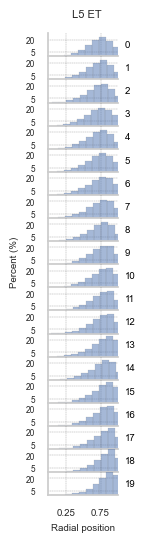

C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
meta NOT subset; don't know how to subset; dropped


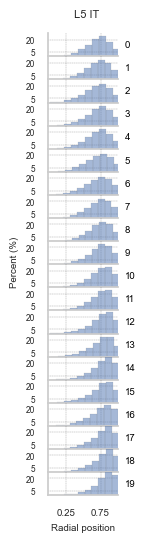

C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
meta NOT subset; don't know how to subset; dropped


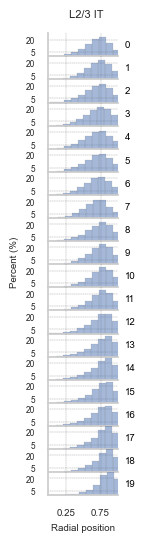

C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
meta NOT subset; don't know how to subset; dropped


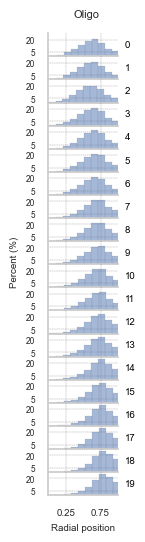

C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
meta NOT subset; don't know how to subset; dropped


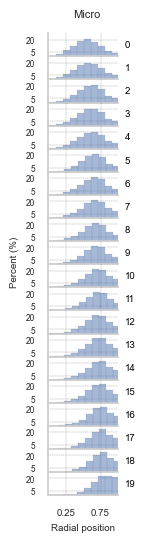

C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
meta NOT subset; don't know how to subset; dropped


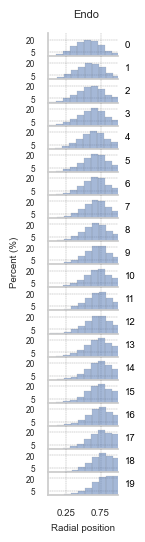

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sel_celltype = 'L2/3 IT'
for sel_celltype in ['L5 ET','L5 IT', 'L2/3 IT', 'Oligo', 'Micro','Endo'][:]:
    
    sel_sc_ave_radial_df_all = sc_ave_radial_df_all[sc_ave_radial_df_all['celltype']==sel_celltype]
    # melt all loci to get radial position as rows
    rp_cols = [c for c in sel_sc_ave_radial_df_all if '_rp_ave' in c]
    df = pd.melt(sel_sc_ave_radial_df_all, id_vars = ['celltype'],value_vars=rp_cols, var_name='loci_name', value_name='radial_position')

    # rank loci by their RNA/ATAC
    col_to_sort = 'mean_rna_2X_2000kb'
    rna_atac_df = ref_measure_dict_byGroup[sel_celltype]
    sorted_rna_atac_df = rna_atac_df.sort_values(by = col_to_sort, ascending = False)

    df['loci_name'] = df['loci_name'].apply(lambda x: x.split('_rp_ave')[0])
    df['loci_name'] = pd.Categorical(df['loci_name'], categories=sorted_rna_atac_df.index.tolist(), ordered=True)
    df = df.sort_values('loci_name')
    # split into 10 percentiles
    rank_loci_dict = {k:v for v, k in enumerate(sorted_rna_atac_df.index.tolist())}
    df['loci_rank'] = df['loci_name'].map(lambda x: rank_loci_dict[x])
    total_qs = 20
    df['bin'] = pd.qcut(df['loci_rank'], q=total_qs, labels=False)

    # adjust the figure size
    total_bins = total_qs  # Top 10 + Bottom 10
    plot_height_per_bin = 0.3  # in inches
    figure_height = total_bins * plot_height_per_bin -2  # Add a bit more space for overlap handling
    figure_width = 1.2  # adjust as needed



    def map_color_toBin(_bin, df):
        # check if the median of all loci from this bin is larger than the median of all loci across all celltypes
        loci_bin = np.unique(df[df['bin']==_bin]['loci_name']).tolist()
        if sorted_rna_atac_df.loc[loci_bin][col_to_sort].median() > active_gene_th:
            color='orange'
        else:
            color='skyblue'
        #return color # if use different color
        return 'black'
    
    bin_color_dict = {_bin:map_color_toBin(_bin, df) for _bin in np.unique(df['bin']).tolist()}    
    # Set the overall aesthetics
    sns.set(style="whitegrid", rc={"axes.facecolor": (0, 0, 0, 0)})
    plt.rcParams['grid.linewidth'] = 0.5  # Set the desired grid thickness

    # Proceed with plotting
    g = sns.FacetGrid(df, row="bin", hue="bin", aspect=3, height=plot_height_per_bin, palette=bin_color_dict)

    def plot_with_placeholder(data, **kwargs):
        # Extract the gene label from kwargs, defaulting to an empty string if not found
        gene = kwargs.get('label', '')
        if gene == '...':
            plt.gca().text(0.5, 0.5, '...', ha='center', va='center', transform=plt.gca().transAxes)
        else:
            # proceed with your plotting logic for actual genes
            sns.histplot(x=data['radial_position'],
                         binwidth=.1,#bins=50, 
                          alpha=0.5, 
                          linewidth=0.1, 
                         edgecolor='gray',
                          #edgecolor='gray', 
                         stat='percent',)

    # plot the actual data
    g.map_dataframe(plot_with_placeholder)
    # adjust layout and aesthetics
    g.set_titles("")
    #g.set(yticks=[])
    #g.despine(bottom=True, left=True)

    # custom labels to handle the placeholder
    def label(x, label, **kwargs):
        if label != "...":
            plt.gca().text(1.1, .5, label, fontsize=7, ha="left", va="center", transform=plt.gca().transAxes, **kwargs)
    g.map(label, "bin")

    # Loop through axes to adjust y-labels and x-ticks
    for _ax_idx, ax in enumerate(g.axes.flat):
        
        ax.set_xlim([0,1])
        ax.set_ylim([0,27.5])
        # Rotate y-axis labels
        #ax.set_ylabel(ax.get_ylabel(), rotation=0, ha='right')
        ax.set_ylabel('')
        ax.set_yticks([5,  20.,])
        for label in ax.get_yticklabels():
            label.set_fontsize(6)

        if _ax_idx == len(g.axes.flat)-1:
            ax.xaxis.set_tick_params(labelbottom=True) 
            ax.set_xlabel('Radial position', fontsize=7)
            # Set x-axis ticks
            ax.set_xticks([0.25,  0.75,])
            ax.set_xticklabels([str(_x) for _x in [0.25,  0.75]], fontsize=7)
            # Set the x-axis label
            

    # set grid color for all subplots
    for ax in g.axes.flatten():
        ax.grid(False)  # Enable the grid
        ax.grid(color='black', linestyle='--', linewidth=0.25, alpha=0.5)  # Customize the grid
        
    # further adjust subplot spacing if necessary, depending on the new axis label sizes
    g.fig.subplots_adjust(hspace=0.0)

    g.fig.text(-0.3, 0.5, 'Percent (%)', va='center', rotation='vertical', fontsize=7)
    g.fig.suptitle(f'{sel_celltype}', fontsize=8, y=.92, x=0.55)  # Adds a main title above all subplots

    # save the figure with high DPI
    sel_celltype_fname = sel_celltype.replace('/','_').replace(' ','_')
    _figure_fname = os.path.join(output_figure_folder, f"radial_position_{sel_celltype_fname}_bin_loci_percent.pdf")
    g.savefig(_figure_fname, transparent=True,dpi=300)

    plt.show()
